# Exercise: Publish all the shape file in the folder

This exercise demonstrates how to get the list of shape files in a folder and publish them as feature layers on the portal.

In [1]:
#Connect to your GIS
from arcgis.gis import *
from getpass import getpass

In [2]:
url="https://geosaurus.maps.arcgis.com"
username="amani_geosaurus"
pass1 = getpass()

········


<User username:amani_geosaurus>
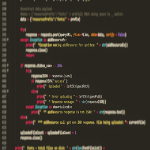

In [3]:
gis = GIS(url, username, pass1)
me = gis.users.me
me

### Find how many credits are available before publishing

In [4]:
credits_before = gis.properties.availableCredits
credits_before

85573.09

### Publish all shape files
Loop through each .zip file, add as an item, then publish it. Determine the credits remaining after publishing.

In [5]:
# Get list of valid file types
from fnmatch import filter
import os

for fld_path, fld_name, files in os.walk(r'D:\DS_demo\Boston_data\archive'):
    valid_files = filter(files, '*.zip')
    print("Number of files found: " + str(len(valid_files)))
    
    for f in valid_files:
        file_path = os.path.join(fld_path, f)
        
        #add to GIS
        print("Adding: " + f, end=" # ")
        added_item = gis.content.add({}, file_path,folder='boston')
        
        #publish the item
        print("publishing", end=" # ")
        published_item = added_item.publish()
        if published_item is not None:
            print("success")

Number of files found: 14
Adding: Municipal_Building_Energy_Reporting_BERDO.zip # publishing # success
Adding: Non_Public_Schools.zip # publishing # success
Adding: Open_Space.zip # publishing # success
Adding: Parcels_2016_Data_Full.zip # publishing # success
Adding: Parcels_2017.zip # publishing # success
Adding: Parking_Meters.zip # publishing # success
Adding: Pedestrian_Ramp_Inventory.zip # publishing # success
Adding: Police_Districts.zip # publishing # success
Adding: Polling_Locations.zip # publishing # success
Adding: Public_Schools.zip # publishing # success
Adding: Traffic_Signals.zip # publishing # success
Adding: Trees.zip # publishing # success
Adding: Wards.zip # publishing # success
Adding: ZIP_Codes.zip # publishing # success


### Check the number of credits after publishing

You can refer to this page to understand how much credits is used for 

In [6]:
credits_after = gis.properties.availableCredits
credits_after

85573.09